In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# CSV ko read karna, first two rows hataane ke liye skiprows=2
df = pd.read_csv("API_SP.DYN.LE00.IN_DS2_en_CSV_v2_76065.csv", skiprows=2)

# Columns ke names sahi karna
df.columns = ["Country", "Country Code", "Indicator", "Indicator Code"] + list(range(1960, 2023))

# Float years ko int me convert karna
float_cols = df.select_dtypes(include=['float64']).columns
df[float_cols] = df[float_cols].fillna(0).astype(int)

#to reset index
df.index = range(1, len(df) + 1)

#to drop column
df.drop(columns=['Indicator','Indicator Code'], inplace=True)

# Check karne ke liye head print karo
df.head(4)


,Country,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,Aruba,ABW,64,64,64,65,65,65,66,66,...,75,75,75,75,75,76,76,75,74,74
2,Africa Eastern and Southern,AFE,44,44,44,44,45,45,45,45,...,60,61,61,62,62,63,63,63,62,62
3,Afghanistan,AFG,32,33,33,34,34,34,35,35,...,62,62,62,63,63,63,63,62,61,62
4,Africa Western and Central,AFW,37,38,38,39,39,39,39,39,...,55,55,56,56,56,57,57,57,56,57


In [9]:
ax = df.iloc[:,4:].mean() #each year life expectancy. 
# Extract years as a NumPy array (Index ko array banane ke liye)
years = ax.index.to_numpy()

# Extract mean values as a NumPy array
mean_values = ax.to_numpy()

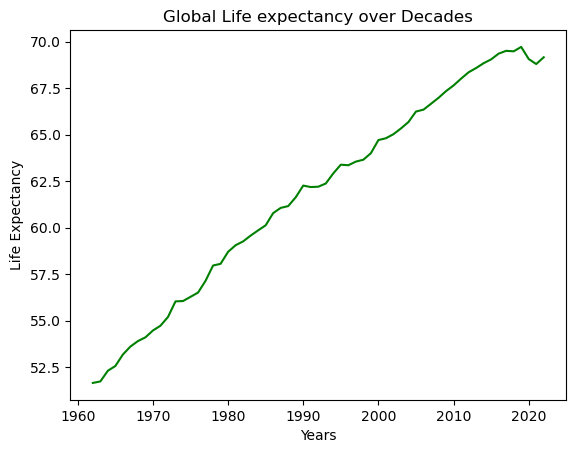

In [12]:
# data to be plotted
# Write directly in case of numpy arrays
x = years
y = mean_values
 
# plotting
plt.title("Global Life expectancy over Decades") 
plt.xlabel("Years") 
plt.ylabel("Life Expectancy") 
plt.plot(x, y, color ="green") 
plt.show()

In [15]:
developed = df[df["Country"].isin(["United States", "Germany", "Japan"])]
developing = df[df["Country"].isin(["India", "Nigeria", "Bangladesh"])]

In [21]:
print(type(developed))
print(type(developing))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [22]:
dd = developed.to_numpy()
dg = developing.to_numpy()

In [29]:
#if you want to print numpy array then uncomment it. 
#dd

In [28]:
#dg 
#if you want to print numpy array uncomment it

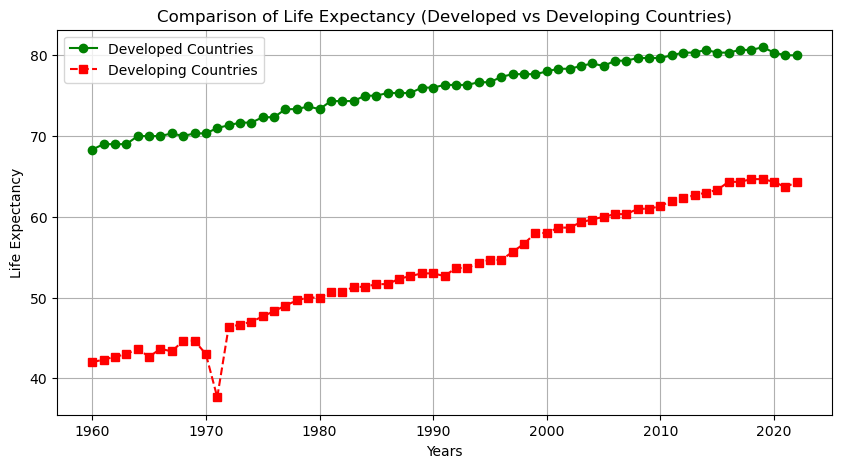

In [27]:
# Step 1: Extract years (first row, skipping country name & code)
years = np.arange(1960, 1960 + dd.shape[1] - 2)  # Years based on data length

# Step 2: Extract average life expectancy
dd_avg = dd[:, 2:].astype(int).mean(axis=0)  # Developed Countries avg
dg_avg = dg[:, 2:].astype(int).mean(axis=0)  # Developing Countries avg

# Step 3: Plot comparison
plt.figure(figsize=(10, 5))

plt.plot(years, dd_avg, marker='o', linestyle='-', color='green', label="Developed Countries")
plt.plot(years, dg_avg, marker='s', linestyle='--', color='red', label="Developing Countries")

# Labels and title
plt.xlabel("Years")
plt.ylabel("Life Expectancy")
plt.title("Comparison of Life Expectancy (Developed vs Developing Countries)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


### **Step 1: Years Generate Karna**  
Pehle hum `np.arange()` ka use karke years ka array bana rahe hain.   
Iske liye `dd.shape[1] - 2` use ho raha hai kyunki pehle do columns country name aur country code hain, jo nahi chahiye.

```python
years = np.arange(1960, 1960 + (dd.shape[1] - 2))
```

---

### **Step 2: Average Life Expectancy Calculate Karna**  
Ab hum `dd` aur `dg` numpy arrays ka average nikal rahe hain, sirf numeric data ke liye.  
`[:, 2:]` ka matlab hai:  
- `:` → Saari rows lo  
- `2:` → 3rd column se aage ka data lo (life expectancy values)  

Phir `astype(float)` use kiya kyunki data shayad string format me ho sakta hai.  
`mean(axis=0)` ka use kar rahe hain taki har column (saal) ka average mile.

```python
avg_dd = dd[:, 2:].astype(float).mean(axis=0)
avg_dg = dg[:, 2:].astype(float).mean(axis=0)
```

---

### **Step 3: Graph Plot Karna**  
- `plt.plot()` do baar use kar rahe hain.  
- Pehle `avg_dd` ka plot green color aur 'o' marker (circle) ke saath.
- Dusre `avg_dg` ka plot red color aur 's' marker (square) ke saath.

```python
plt.figure(figsize=(10, 5))
plt.plot(years, avg_dd, color="green", marker="o", label="Developed Countries")
plt.plot(years, avg_dg, color="red", marker="s", label="Developing Countries")
```

---

### **Step 4: Labels & Legend**  
Achi readability ke liye title, xlabel, ylabel aur legend add kar rahe hain.

```python
plt.title("Developed vs Developing Countries: Life Expectancy Over Time")
plt.xlabel("Years")
plt.ylabel("Average Life Expectancy")
plt.legend()
plt.grid(True)
plt.show()
```
